In [3]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [8]:
#reading data
df1 =pd.read_csv("data\Train.csv")
df1.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.40000,nan,-1.31775,36.83037,-1.30041,36.82974,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.40000,nan,-1.35145,36.89932,-1.29500,36.81436,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,nan,nan,-1.30828,36.84342,-1.30092,36.82820,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.20000,nan,-1.28130,36.83240,-1.25715,36.79506,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.40000,nan,-1.26660,36.79212,-1.29504,36.80982,Rider_Id_770,1214


In [9]:
#Reading data
df2 =pd.read_csv("data\Test.csv")
df2.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,nan,nan,-1.33327,36.87081,-1.30525,36.82239,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,nan,nan,-1.27264,36.79472,-1.27701,36.82391,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.80000,nan,-1.29089,36.82297,-1.27657,36.85136,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.50000,nan,-1.29050,36.80965,-1.30338,36.79066,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.40000,nan,-1.28108,36.81442,-1.26647,36.79216,Rider_Id_858


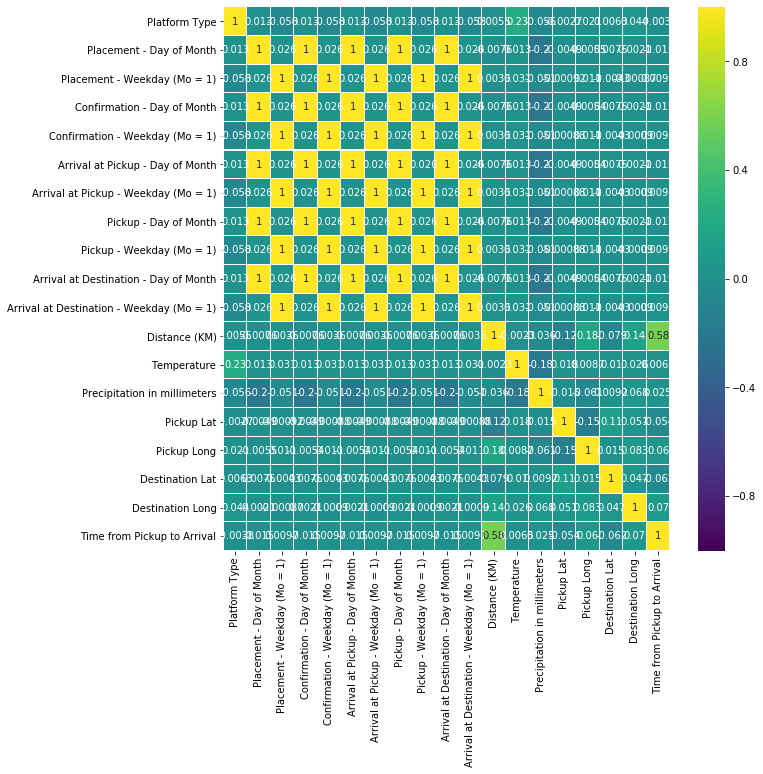

In [10]:
#Analysing data
df_kor = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

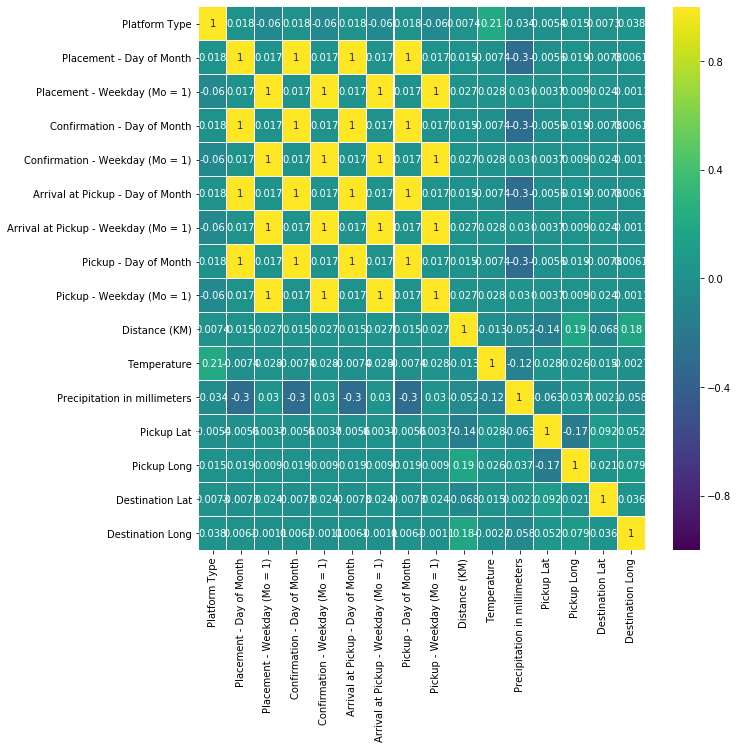

In [11]:
#Analysing data
df_kor = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [12]:
#preparing data 

In [15]:
# checking missing values
df1.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [18]:
# replacing missing values with the mean for the temperature 
df1["Temperature"].fillna(df1["Temperature"].mean, inplace = True)

In [19]:
# replacing missing values with the mean for the precipitation
df1["Precipitation in millimeters"].fillna(df1["Precipitation in millimeters"].mean, inplace = True)

In [21]:
# check if the null values have been replaced
df1.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

In [22]:
df2.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [25]:
# replacing missing values with the mean for the temperature 
df2["Temperature"].fillna(df2["Temperature"].mean, inplace = True)

In [26]:
# replacing missing values with the mean for the temperature 
df2["Precipitation in millimeters"].fillna(df2["Precipitation in millimeters"].mean, inplace = True)

In [28]:
# check if the null values have been replaced
df2.isnull().sum()

Order No                                0
User Id                                 0
Vehicle Type                            0
Platform Type                           0
Personal or Business                    0
Placement - Day of Month                0
Placement - Weekday (Mo = 1)            0
Placement - Time                        0
Confirmation - Day of Month             0
Confirmation - Weekday (Mo = 1)         0
Confirmation - Time                     0
Arrival at Pickup - Day of Month        0
Arrival at Pickup - Weekday (Mo = 1)    0
Arrival at Pickup - Time                0
Pickup - Day of Month                   0
Pickup - Weekday (Mo = 1)               0
Pickup - Time                           0
Distance (KM)                           0
Temperature                             0
Precipitation in millimeters            0
Pickup Lat                              0
Pickup Long                             0
Destination Lat                         0
Destination Long                  

In [ ]:
#building the model

In [29]:
df1['test'] = 0
df2['test'] = 1

In [32]:
df1_df2 = pd.concat([df1, df2], axis=0, join='outer', join_axes=None, ignore_index=False,                   
                   keys=None, levels=None, names=None, 
                   copy=True )

In [ ]:
#making time conversions

In [33]:
df1_df2['month'] =pd.DatetimeIndex(df1_df2['Pickup - Time']).month

In [34]:
df1_df2['day'] =pd.DatetimeIndex(df1_df2['Pickup - Time']).day

In [38]:
df1_df2['seconds'] =(pd.DatetimeIndex(df1_df2['Pickup - Time']).hour * 60) + (pd.DatetimeIndex(df1_df2['Pickup - Time']).minute *60)

In [40]:
df1_df2.columns = df1_df2.columns.str.replace('Distance \(KM\)', 'Dist')

In [41]:
df1_df2.Dist

0        4
1       16
2        3
3        9
4        9
5        9
6        5
7        3
8        9
9       14
10       9
11      17
12      10
13      21
14       1
15      13
16      17
17      13
18       5
19       5
20       7
21      24
22      11
23      10
24       3
25      13
26       5
27      17
28       9
29       1
        ..
7038     5
7039    10
7040    17
7041     2
7042     4
7043     6
7044     8
7045    10
7046     2
7047     8
7048    11
7049     4
7050     5
7051     5
7052     4
7053     5
7054     5
7055     8
7056    23
7057    22
7058     6
7059     8
7060    18
7061     8
7062     5
7063     5
7064    22
7065    10
7066    18
7067     8
Name: Dist, Length: 28269, dtype: int64

In [43]:
df1_df2['log_distance'] = np.log(df1_df2['Dist'] + 1)

In [44]:
def label_encoder(df):
    def numerical_features(df):
        columns = df.columns
        return df._get_numeric_data().columns

    def categorical_features(df):
        numerical_columns = numerical_features(df)
        return(list(set(df.columns) - set(numerical_columns)))
    
    categorical = categorical_features(df)
    # Creating the label encoder object
    le =  LabelEncoder()
    
    # Iterating over the "object" variables to transform the categories into numbers 
    for col in categorical:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

In [46]:
 df1_df2.columns = df1_df2.columns.str.replace('Arrival at Destination - Time', 'Delivery_time')


In [47]:
df1_df2.Delivery_time

0       10:39:55 AM
1       12:17:22 PM
2        1:00:38 PM
3       10:05:27 AM
4       10:25:37 AM
5        4:23:41 PM
6       10:19:45 AM
7        2:33:26 PM
8        1:19:35 PM
9        6:31:57 PM
10      10:32:29 AM
11       5:22:25 PM
12       3:45:59 PM
13      10:15:58 AM
14      10:33:52 AM
15       2:10:11 PM
16      12:54:00 PM
17       1:09:07 PM
18      11:59:41 AM
19       4:00:27 PM
20      11:03:24 AM
21      11:51:02 AM
22       8:13:57 PM
23      10:58:49 AM
24       4:53:34 PM
25       1:36:14 PM
26       3:21:05 PM
27       1:10:58 PM
28       3:22:11 PM
29       8:57:03 AM
           ...     
7038            NaN
7039            NaN
7040            NaN
7041            NaN
7042            NaN
7043            NaN
7044            NaN
7045            NaN
7046            NaN
7047            NaN
7048            NaN
7049            NaN
7050            NaN
7051            NaN
7052            NaN
7053            NaN
7054            NaN
7055            NaN
7056            NaN


In [49]:
df1_df2.columns = df1_df2.columns.str.replace('Time from Pickup to Arrival', 'speed')


In [50]:
df1_df2.speed

0       745.00000
1      1993.00000
2       455.00000
3      1341.00000
4      1214.00000
5      3191.00000
6      1380.00000
7       646.00000
8      3398.00000
9      3439.00000
10     1056.00000
11     3898.00000
12     2642.00000
13     2904.00000
14      407.00000
15     1906.00000
16     2308.00000
17     2639.00000
18     1570.00000
19     4220.00000
20     1112.00000
21     2124.00000
22     1488.00000
23     1404.00000
24     3617.00000
25     2606.00000
26     1149.00000
27     1731.00000
28     3241.00000
29      713.00000
          ...    
7038          nan
7039          nan
7040          nan
7041          nan
7042          nan
7043          nan
7044          nan
7045          nan
7046          nan
7047          nan
7048          nan
7049          nan
7050          nan
7051          nan
7052          nan
7053          nan
7054          nan
7055          nan
7056          nan
7057          nan
7058          nan
7059          nan
7060          nan
7061          nan
7062      

In [ ]:
df1_df2['speed'] = df1_df2[df1_df2['test'] == 0]['Delivery_time']/df1_df2[df1_df2['test'] == 0]['Dist']
speed_model = df1_df2[df1_df2['test'] == 0][['speed','Vehicle Type','Delivery_time']].groupby('Vehicle Type').agg(['mean'])
df1_df2 = df1_df2.join(speed_model, on ='Vehicle Type')
speed_OrderNo = df1_df2_t[all_t['test'] == 0][['speed','Order No','Delivery_time']].groupby('Order No').agg(['mean'])
df1_df2 = df1_df2.join(speed_OrderNo, on ='Order No' , rsuffix = 'pack')

In [51]:
df1_df2['new_param'] = df1_df2['Platform Type'] * df1_df2['Dist']

In [ ]:
X = np.array(df1_df2_en[df1_df2_en['test'] == 0].drop(['Order No', 'Delivery_time','speed'], axis=1))
y = np.log(df1_df2_en[df1_df2_en['test'] == 0]['Delivery_time'].values)
median_trip_duration = np.median(df1_df2_en[df1_df2_en['test'] == 0]['Delivery_time'].values)

print('X.shape = ' + str(X.shape))
print('y.shape = ' + str(y.shape))

X_test = np.array(df1_df2_en[df1_df2_en['test'] == 1].drop(['Order No','speed','Delivery_time'], axis=1))

print('X_test.shape = ' + str(X_test.shape))

print('Training and making predictions')
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0}
n_estimators = 600

n_iters = 5
preds_buf = []
err_buf = []
for i in range(n_iters): 
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=i)
    d_train = pd.df1_df2(x_train, label=y_train)
    d_valid = pd.df1_df2(x_valid, label=y_valid)
    watchlist = [d_valid]

    model = df1_df2.train(params, d_train, n_estimators, watchlist, verbose_eval=0  )

    preds = model.predict(x_valid)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    err = rmsle(np.exp(y_valid), preds)
    err_buf.append(err)
    print('RMSLE = ' + str(err))
    
    preds = model.predict(X_test)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    preds_buf.append(preds)

print('Mean RMSLE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
# Average predictions 

In [ ]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

In [ ]:
preds = np.mean(preds_buf, axis=0)

In [ ]:
subm = pd.DataFrame()
subm['id'] = all_t[all_t['test']==1].id.values
subm['delivery_time'] = preds
subm.to_csv('submission_lgbm_600.csv', index=False)